In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Chargement du fichier
df = pd.read_csv('../data/acs2015_census_tract_data.csv',sep=",")

# Création de la cible binaire comme demandé par le TP (Revenu > 50k ou non)
# On crée la colonne 'Income_Class' : 1 si > 50000, sinon 0
df['Income_Class'] = df['Income'].apply(lambda x: 1 if x > 50000 else 0)

print("Données chargées et colonne cible créée !")

Données chargées et colonne cible créée !


In [11]:
# --- Question : Combien de classes et d'instances par classe ? ---
print("\nRépartition des classes (0: <=50K, 1: >50K) :")
print(df['Income_Class'].value_counts())

# --- Question : Quelles caractéristiques et quels types ? ---
print("\nRésumé des données et types :")
df.info()

# --- Question : Combien d'instances ? ---
print(f"Dimensions du projet (lignes, colonnes) : {df.shape}")


# --- Question : Comment sont organisées les instances ? ---
print("\nAperçu de l'organisation des données :")
display(df.head())


Répartition des classes (0: <=50K, 1: >50K) :
Income_Class
1    38096
0    35905
Name: count, dtype: int64

Résumé des données et types :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74001 entries, 0 to 74000
Data columns (total 38 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CensusTract      74001 non-null  int64  
 1   State            74001 non-null  object 
 2   County           74001 non-null  object 
 3   TotalPop         74001 non-null  int64  
 4   Men              74001 non-null  int64  
 5   Women            74001 non-null  int64  
 6   Hispanic         73311 non-null  float64
 7   White            73311 non-null  float64
 8   Black            73311 non-null  float64
 9   Native           73311 non-null  float64
 10  Asian            73311 non-null  float64
 11  Pacific          73311 non-null  float64
 12  Citizen          74001 non-null  int64  
 13  Income           72901 non-null  float64
 14  IncomeErr  

,CensusTract,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,Income_Class
0,1001020100,Alabama,Autauga,1948,940,1008,0.9,87.4,7.7,0.3,...,2.3,2.1,25.0,943,77.1,18.3,4.6,0.0,5.4,1
1,1001020200,Alabama,Autauga,2156,1059,1097,0.8,40.4,53.3,0.0,...,0.7,0.0,23.4,753,77.0,16.9,6.1,0.0,13.3,0
2,1001020300,Alabama,Autauga,2968,1364,1604,0.0,74.5,18.6,0.5,...,0.0,2.5,19.6,1373,64.1,23.6,12.3,0.0,6.2,0
3,1001020400,Alabama,Autauga,4423,2172,2251,10.5,82.8,3.7,1.6,...,2.6,1.6,25.3,1782,75.7,21.2,3.1,0.0,10.8,1
4,1001020500,Alabama,Autauga,10763,4922,5841,0.7,68.5,24.8,0.0,...,0.6,0.9,24.8,5037,67.1,27.6,5.3,0.0,4.2,1


Génération du croisement des variables deux à deux...


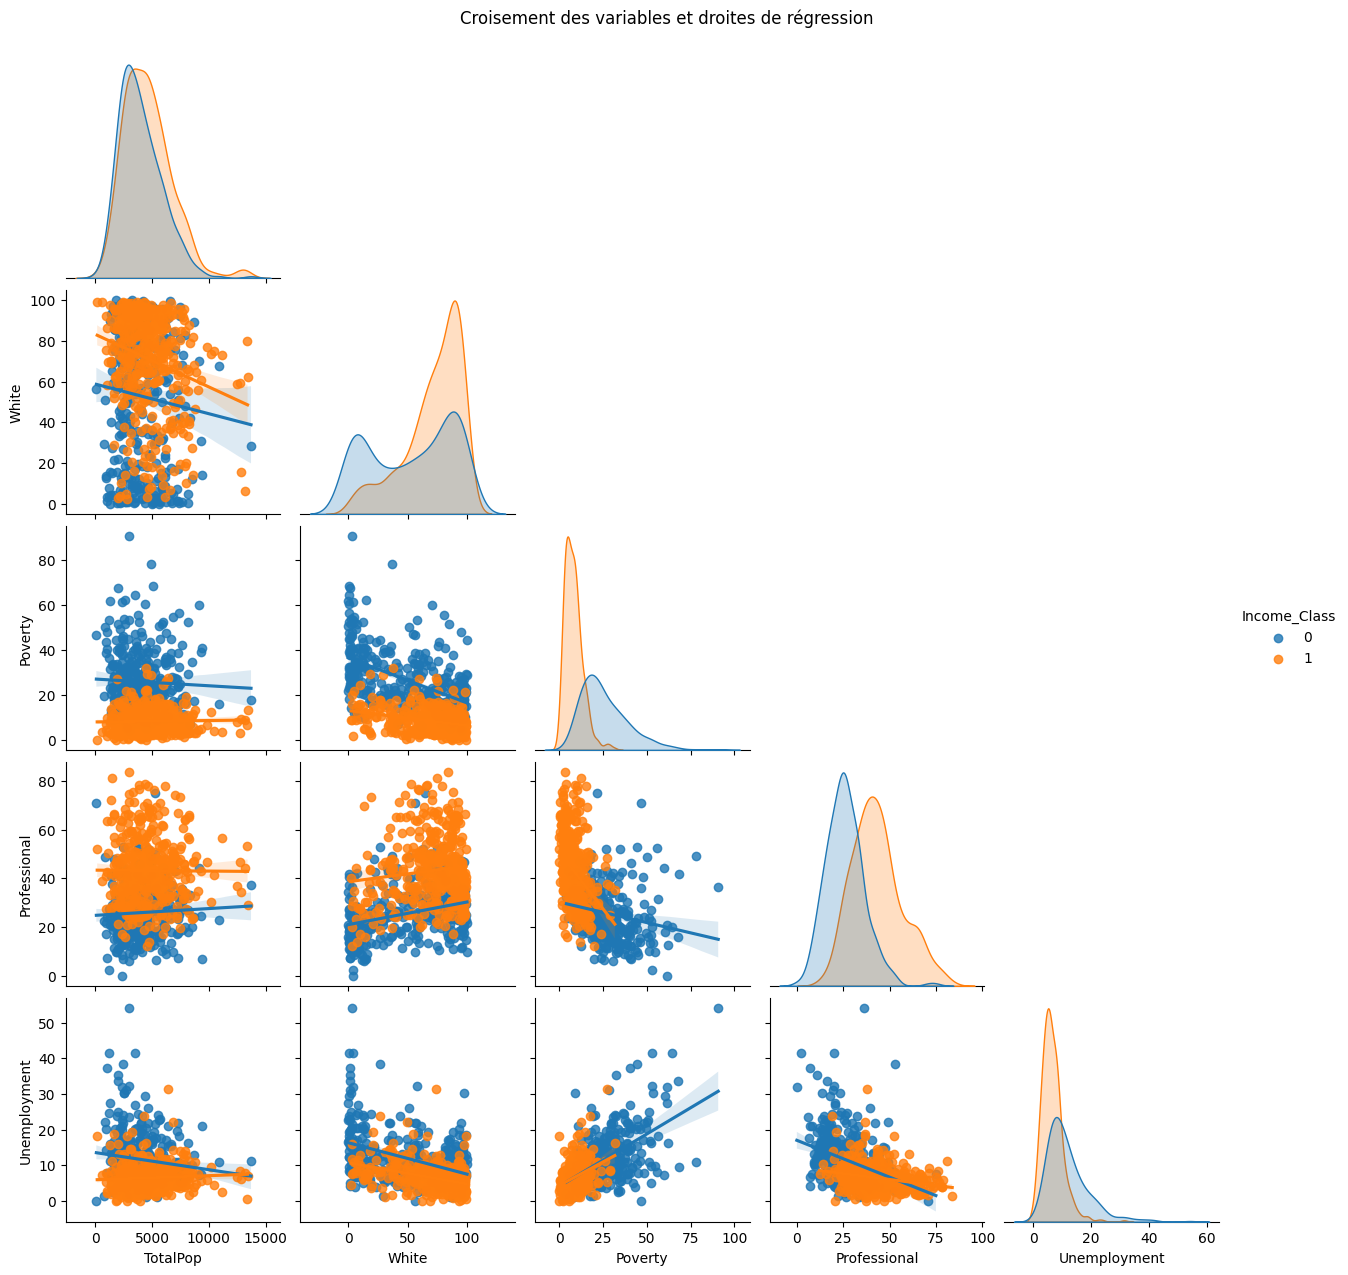

In [12]:
# --- Question 2 : Croisement des variables deux à deux ---

# 1. On choisit les variables les plus significatives pour le revenu
# (TotalPop, White, Poverty, Professional, Unemployment) + notre cible
cols_analyse = ['TotalPop', 'White', 'Poverty', 'Professional', 'Unemployment', 'Income_Class']

# 2. On crée le graphique croisé (Pairplot)
# kind='reg' : trace les droites de régression demandées
# corner=True : permet de ne pas afficher les doublons (moitié du graphique) pour plus de clarté
print("Génération du croisement des variables deux à deux...")

sns.pairplot(df[cols_analyse].dropna().sample(800), 
             hue='Income_Class', 
             kind='reg', 
             diag_kind='kde',
             corner=True)

plt.suptitle("Croisement des variables et droites de régression", y=1.02)
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 1. On ne garde que les colonnes numériques pour le KNN
# On enlève 'Income' (car c'est le montant exact) et les IDs
X = df.select_dtypes(include=[np.number]).drop(columns=['Income', 'Income_Class', 'CensusId'], errors='ignore')
y = df['Income_Class']

# 2. Gestion des valeurs manquantes (obligatoire pour KNN)
X = X.fillna(X.mean())

# 3. Séparation 80% Apprentissage / 20% Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Base d'apprentissage : {X_train.shape[0]} quartiers")
print(f"Base de test : {X_test.shape[0]} quartiers")

Base d'apprentissage : 59200 quartiers
Base de test : 14801 quartiers


Score Apprentissage : 0.8918
Score Test : 0.8458


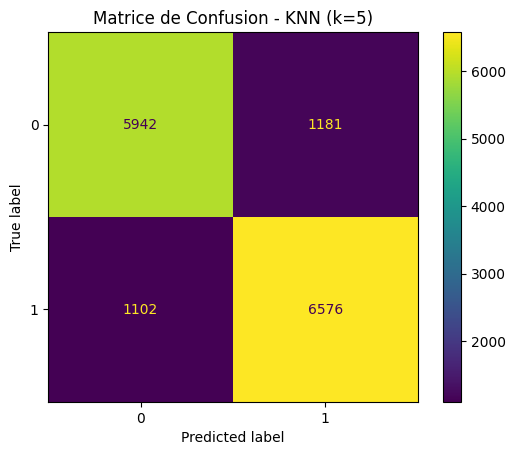

In [14]:
# 1. Création du modèle (par défaut k=5)
knn = KNeighborsClassifier(n_neighbors=5)

# 2. Entraînement
knn.fit(X_train, y_train)

# 3. Calcul des scores
score_train = knn.score(X_train, y_train)
score_test = knn.score(X_test, y_test)

print(f"Score Apprentissage : {score_train:.4f}")
print(f"Score Test : {score_test:.4f}")

# 4. Affichage de la Matrice de Confusion
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Matrice de Confusion - KNN (k=5)")
plt.show()

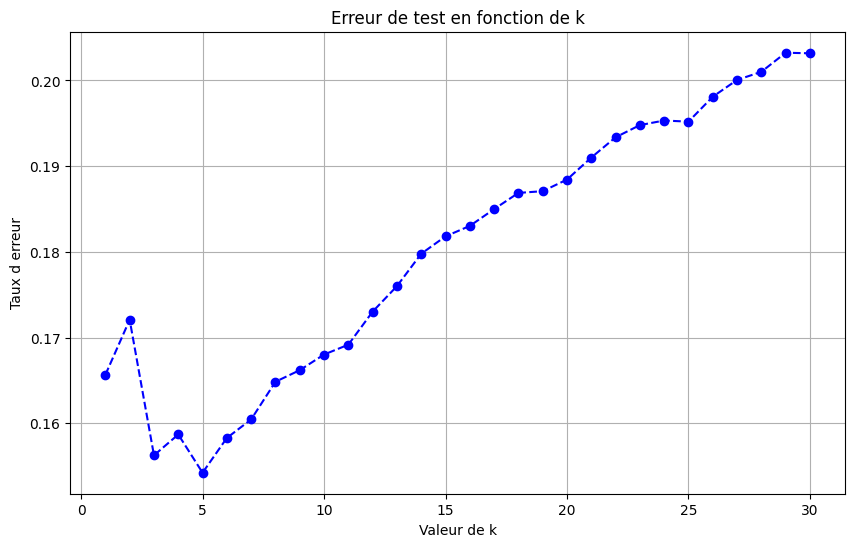

Le meilleur score de test est obtenu pour k = 5


In [15]:
# --- Question A-3.2 : Influence de k ---
import matplotlib.pyplot as plt

errors = []
k_range = range(1, 31) # On teste k de 1 à 30

for k in k_range:
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train, y_train)
    errors.append(1 - knn_temp.score(X_test, y_test)) # On calcule l'erreur

# Affichage du graphique
plt.figure(figsize=(10, 6))
plt.plot(k_range, errors, marker='o', linestyle='--', color='blue')
plt.title('Erreur de test en fonction de k')
plt.xlabel('Valeur de k')
plt.ylabel('Taux d erreur')
plt.grid(True)
plt.show()

# Trouver le meilleur k
best_k = k_range[np.argmin(errors)]
print(f"Le meilleur score de test est obtenu pour k = {best_k}")

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 1. Initialisation des modèles
models = {
    "KNN (k=5)": KNeighborsClassifier(n_neighbors=5),
    "Régression Logistique": LogisticRegression(max_iter=1000),
    "Arbre de Décision": DecisionTreeClassifier(random_state=42)
}

# 2. Entraînement et calcul des scores
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = accuracy_score(y_test, y_pred)

# 3. Affichage des résultats
print("--- Comparaison des performances ---")
for name, score in results.items():
    print(f"{name} : {score:.4f}")

--- Comparaison des performances ---
KNN (k=5) : 0.8458
Régression Logistique : 0.4813
Arbre de Décision : 0.8542


In [17]:
import joblib

# 1. On définit le modèle gagnant (Arbre de Décision)
# On le ré-entraîne pour être sûr qu'il est prêt
best_model = DecisionTreeClassifier(random_state=42)
best_model.fit(X_train, y_train)

# 2. Enregistrement sous le format .pkl
# Le fichier sera créé dans votre dossier actuel
joblib.dump(best_model, 'census.pkl')

print("Le modèle optimal (Arbre de Décision) a été enregistré sous le nom 'census.pkl'")

Le modèle optimal (Arbre de Décision) a été enregistré sous le nom 'census.pkl'


In [18]:
# --- PARTIE B-1 : PRE-PROCESSING AVANCÉ ---

# 1. Suppression des colonnes inutiles (identifiant et cible continue)
df_clean = df.drop(columns=['CensusId', 'Income'], errors='ignore')

# 2. Remplacer les variables catégorielles (State, County) par des Dummies
# On utilise drop_first=True pour éviter le piège de la colinéarité
df_final = pd.get_dummies(df_clean, columns=['State', 'County'], drop_first=True)

# 3. Gestion des valeurs manquantes (médiane pour plus de robustesse)
df_final = df_final.fillna(df_final.median())

# 4. Séparation X (caractéristiques) et y (cible)
X_b = df_final.drop(columns=['Income_Class'])
y_b = df_final['Income_Class']

# 5. Split 80/20
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_b, y_b, test_size=0.2, random_state=42)

print(f"Nouvelle largeur des données avec Dummies : {X_b.shape[1]} colonnes")

Nouvelle largeur des données avec Dummies : 2012 colonnes


In [19]:
# --- PARTIE B-2 : CLASSFIEUR CONSTANT ---
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train_b, y_train_b)

const_score = dummy_clf.score(X_test_b, y_test_b)
print(f"Score du classifieur constant : {const_score:.4f}")
print(f"Erreur de test à battre (1 - score) : {1 - const_score:.4f}")

Score du classifieur constant : 0.5187
Erreur de test à battre (1 - score) : 0.4813


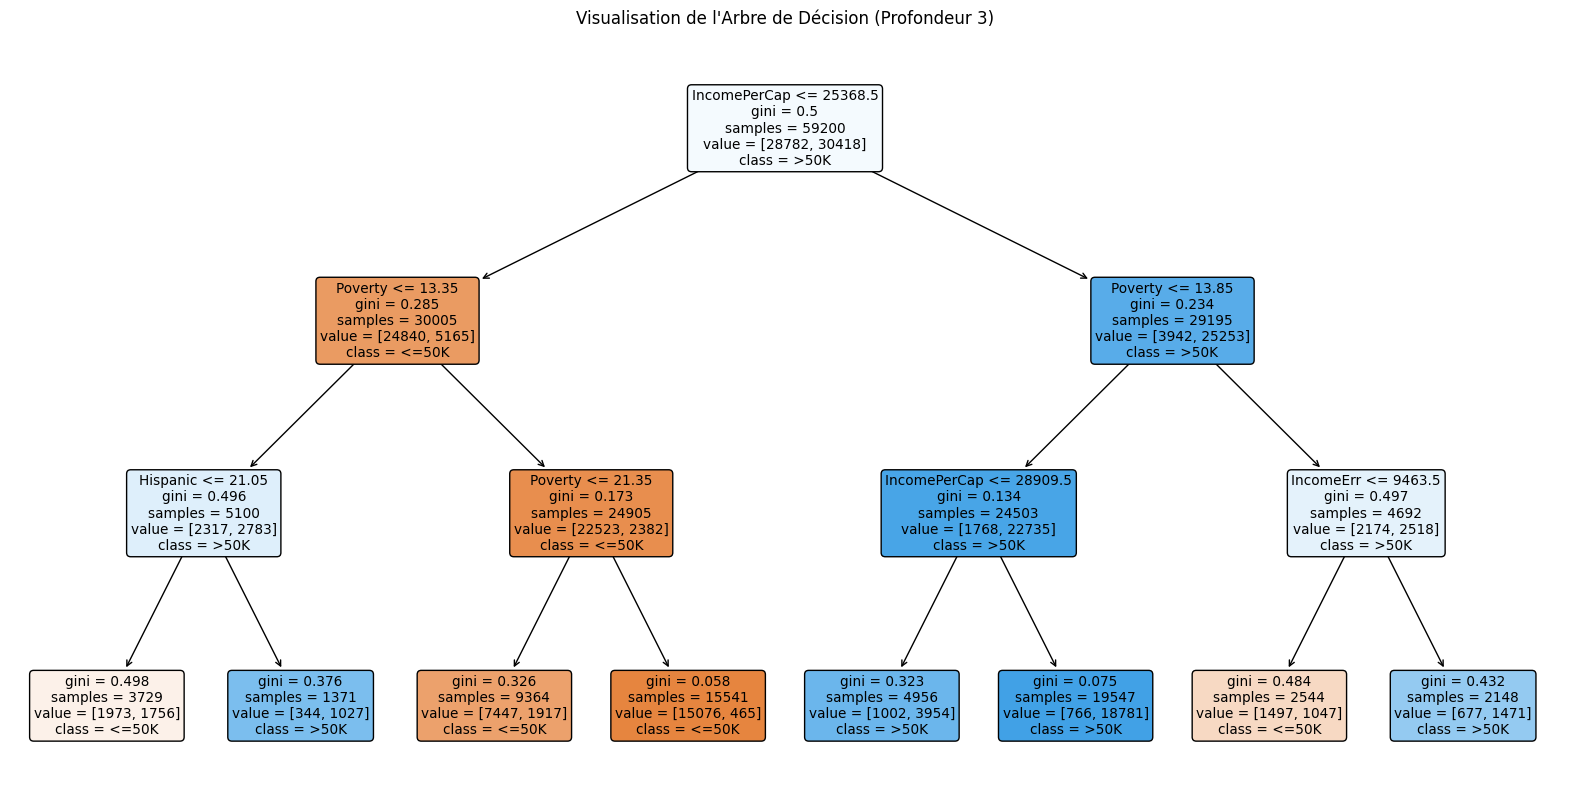

Erreur de test de l'arbre simple : 0.1339


In [20]:
# --- PARTIE B-3 : ARBRE SIMPLE ET VISUALISATION ---
from sklearn.tree import plot_tree

# Création d'un arbre court pour la visualisation
tree_simple = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_simple.fit(X_train_b, y_train_b)

plt.figure(figsize=(20,10))
plot_tree(tree_simple, feature_names=X_b.columns, class_names=['<=50K', '>50K'], filled=True, rounded=True)
plt.title("Visualisation de l'Arbre de Décision (Profondeur 3)")
plt.show()

print(f"Erreur de test de l'arbre simple : {1 - tree_simple.score(X_test_b, y_test_b):.4f}")

In [21]:
from sklearn.model_selection import GridSearchCV

# 1. Définition de la grille de paramètres
# On teste des profondeurs de 2 à 20 et les deux critères classiques
param_grid = {
    'max_depth': [2, 5, 10, 15, 20],
    'criterion': ['gini', 'entropy']
}

# 2. Création du GridSearchCV
# cv=5 signifie qu'il va diviser les données en 5 pour la validation croisée
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')

# 3. Entraînement sur la base d'apprentissage
print("Recherche du meilleur paramètre (GridSearch)...")
grid_search.fit(X_train_b, y_train_b)

# 4. Résultats
print(f"Meilleurs paramètres : {grid_search.best_params_}")
best_tree = grid_search.best_estimator_

# 5. Évaluation du modèle optimisé
score_opti = best_tree.score(X_test_b, y_test_b)
print(f"Erreur de test du modèle optimisé : {1 - score_opti:.4f}")

Recherche du meilleur paramètre (GridSearch)...
Meilleurs paramètres : {'criterion': 'entropy', 'max_depth': 10}
Erreur de test du modèle optimisé : 0.1184


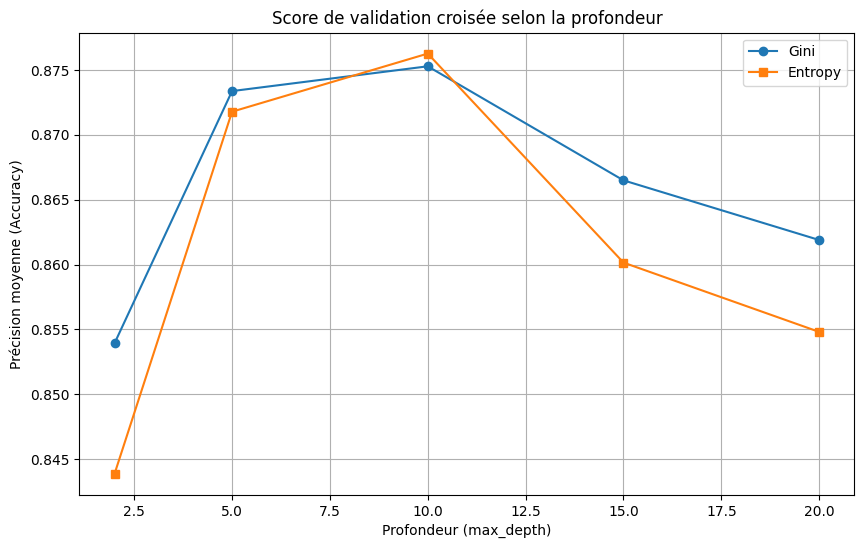

In [22]:
# Extraction des résultats pour le critère 'gini'
results = grid_search.cv_results_
depths = [5, 10, 15, 20] # (ou les valeurs testées dans ta grille)
# On récupère les scores moyens pour chaque paramètre
mean_scores = grid_search.cv_results_['mean_test_score']

# Note : Pour tracer proprement, on va simplifier l'affichage
plt.figure(figsize=(10, 6))
plt.plot(param_grid['max_depth'], mean_scores[:5], marker='o', label='Gini')
plt.plot(param_grid['max_depth'], mean_scores[5:], marker='s', label='Entropy')
plt.title("Score de validation croisée selon la profondeur")
plt.xlabel("Profondeur (max_depth)")
plt.ylabel("Précision moyenne (Accuracy)")
plt.legend()
plt.grid(True)
plt.show()

In [24]:
# --- VERSION ALLÉGÉE ET RAPIDE ---

# 1. On ne garde que 'State' pour les dummies (County est trop lourd)
df_light = df.drop(columns=['CensusId', 'Income', 'County'], errors='ignore')
df_final_light = pd.get_dummies(df_light, columns=['State'], drop_first=True)
df_final_light = df_final_light.fillna(df_final_light.median())

X_light = df_final_light.drop(columns=['Income_Class'])
y_light = df_final_light['Income_Class']

# 2. Séparation
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(X_light, y_light, test_size=0.2, random_state=42)

# 3. Bagging RAPIDE
# n_jobs=-1 utilise TOUS les cœurs de ton i5 en même temps
bagging_model = RandomForestClassifier(n_estimators=100, max_features=None, n_jobs=-1, random_state=42)

print("Lancement du Bagging (version optimisée)...")
bagging_model.fit(X_train_l, y_train_l)
print(f"Terminé ! Score : {bagging_model.score(X_test_l, y_test_l):.4f}")

Lancement du Bagging (version optimisée)...
Terminé ! Score : 0.9019


In [25]:
# 1. On construit la Forêt Aléatoire avec oob_score=True
# On choisit p (max_features) = 'sqrt' (racine carrée du nb de variables), c'est le standard.
p = 'sqrt'
rf_model = RandomForestClassifier(n_estimators=100, 
                                  max_features=p, 
                                  oob_score=True, 
                                  n_jobs=-1, 
                                  random_state=42)

# 2. Entraînement
rf_model.fit(X_train_l, y_train_l)

# 3. Récupération des scores
oob_res = rf_model.oob_score_
test_res = rf_model.score(X_test_l, y_test_l)

print(f"Score Out-Of-Bag (OOB) : {oob_res:.4f}")
print(f"Score sur la base de Test : {test_res:.4f}")
print(f"Différence : {abs(oob_res - test_res):.4f}")

Score Out-Of-Bag (OOB) : 0.8934
Score sur la base de Test : 0.8997
Différence : 0.0063


In [28]:
# --- VERSION RAPIDE C-3 ---
from sklearn.model_selection import GridSearchCV

# On réduit la grille au strict nécessaire pour gagner du temps
param_grid_p = {
    'max_features': ['sqrt', 0.3, 0.5] 
}

# cv=3 au lieu de 5 pour diviser le temps de calcul par deux
grid_p = GridSearchCV(RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42), 
                      param_grid_p, 
                      cv=3) 

print("Lancement de l'optimisation rapide de p...")
grid_p.fit(X_train_l, y_train_l)

print(f"La meilleure valeur de p est : {grid_p.best_params_}")
print(f"Meilleur score : {grid_p.best_score_:.4f}")

Lancement de l'optimisation rapide de p...
La meilleure valeur de p est : {'max_features': 0.5}
Meilleur score : 0.8982


In [29]:
from sklearn.ensemble import GradientBoostingClassifier

# Configuration selon l'énoncé
# lambda (learning_rate) fixé à 0.1
# p (max_depth) fixé à 3
gb_clf = GradientBoostingClassifier(n_estimators=1000, 
                                    learning_rate=0.1, 
                                    max_depth=3,
                                    validation_fraction=0.1, 
                                    n_iter_no_change=10, 
                                    random_state=42)

gb_clf.fit(X_train_l, y_train_l)

# Le nombre d'arbres optimal choisi par l'early stopping
B_optimal = len(gb_clf.estimators_)
print(f"Nombre d'arbres final (B choisi) : {B_optimal}")

Nombre d'arbres final (B choisi) : 453


In [32]:
# --- CODE DE COMPARAISON CORRIGÉ ---

# 1. On ré-entraîne rapidement les modèles sur les mêmes données (X_train_l)
# pour qu'ils aient tous le même nombre de colonnes.

print("Ajustement des modèles sur les données légères pour la comparaison...")

# Arbre optimisé (on garde la profondeur trouvée en Partie B, ex: 10)
tree_comp = DecisionTreeClassifier(max_depth=10, random_state=42)
tree_comp.fit(X_train_l, y_train_l)

# Random Forest optimisée (on prend p=sqrt ou la valeur trouvée)
rf_comp = RandomForestClassifier(n_estimators=100, max_features='sqrt', n_jobs=-1, random_state=42)
rf_comp.fit(X_train_l, y_train_l)

# Le Gradient Boosting est déjà prêt (gb_clf)

# 2. Nouveau dictionnaire de comparaison
models_comp = {
    "Arbre de Décision": tree_comp,
    "Random Forest": rf_comp,
    "Gradient Boosting": gb_clf
}

print("\n--- COMPARAISON FINALE DES PERFORMANCES ---")
for name, model in models_comp.items():
    y_pred = model.predict(X_test_l)
    score = accuracy_score(y_test_l, y_pred)
    print(f"{name} : {score:.4f}")

Ajustement des modèles sur les données légères pour la comparaison...

--- COMPARAISON FINALE DES PERFORMANCES ---
Arbre de Décision : 0.8808
Random Forest : 0.8997
Gradient Boosting : 0.9083


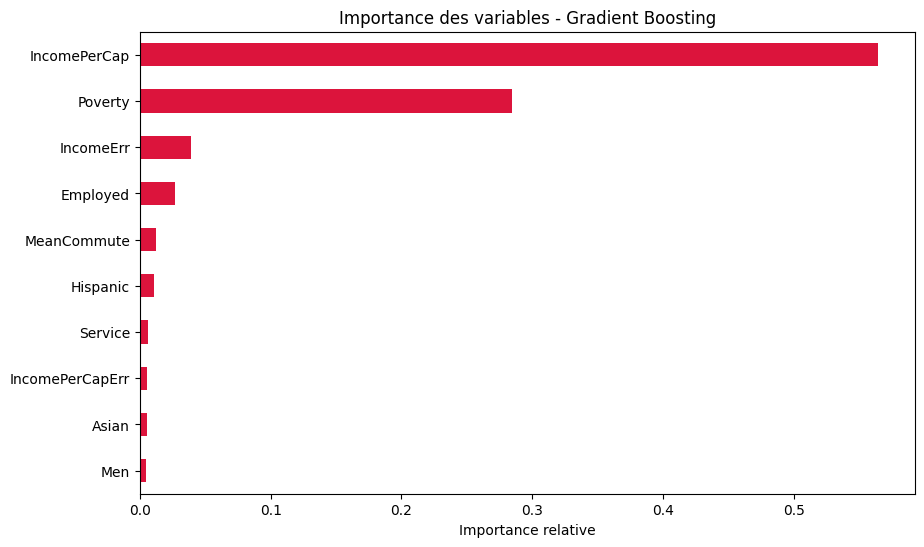

In [33]:
# On récupère les importances du Gradient Boosting
importances = pd.Series(gb_clf.feature_importances_, index=X_light.columns)

# On affiche le Top 10
plt.figure(figsize=(10, 6))
importances.nlargest(10).sort_values().plot(kind='barh', color='crimson')
plt.title("Importance des variables - Gradient Boosting")
plt.xlabel("Importance relative")
plt.show()

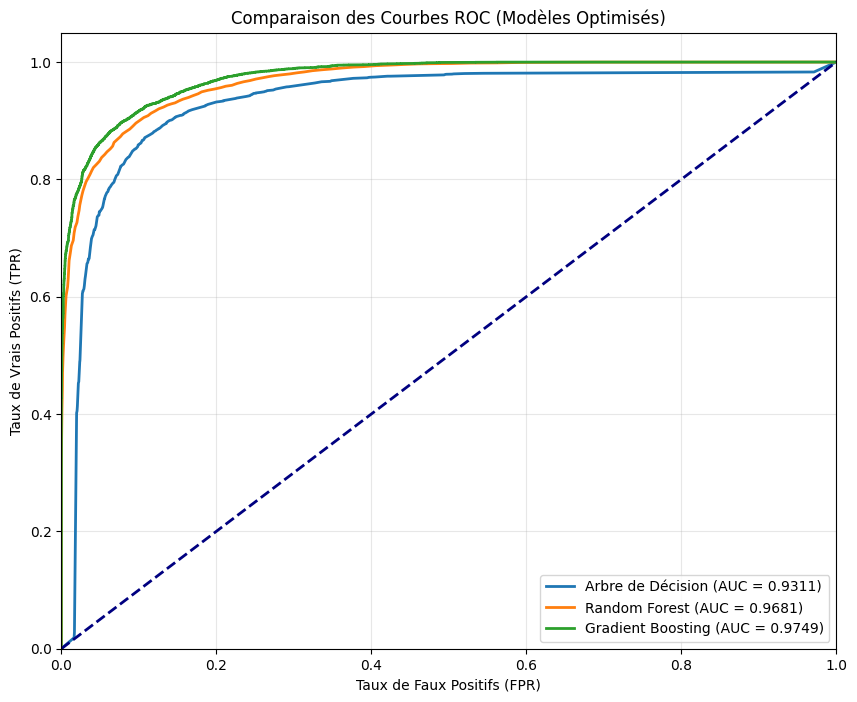

In [36]:
from sklearn.metrics import roc_curve, auc

# 1. Utilisation des modèles compatibles avec X_test_l
models_final = {
    "Arbre de Décision": tree_comp,
    "Random Forest": rf_comp,
    "Gradient Boosting": gb_clf
}

plt.figure(figsize=(10, 8))

for name, model in models_final.items():
    # predict_proba renvoie [probabilité classe 0, probabilité classe 1]
    # On prend [:, 1] pour avoir la probabilité que le revenu soit > 50K
    y_probs = model.predict_proba(X_test_l)[:, 1]
    
    fpr, tpr, _ = roc_curve(y_test_l, y_probs)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.4f})')

# 2. Mise en forme du graphique
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # Ligne de chance
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.title('Comparaison des Courbes ROC (Modèles Optimisés)')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

In [37]:
import joblib
joblib.dump(gb_clf, 'census.pkl')
print("Fichier 'census.pkl' créé. Ton TP est terminé !")

Fichier 'census.pkl' créé. Ton TP est terminé !
